In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import math

In [7]:
df = pd.read_csv('marks_attendance.csv')

In [8]:
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [9]:
df.tail()

,Attendance,MSE,ESE
68,80,10,47
69,78,8,40
70,92,9,49
71,78,11,53
72,78,12,58


In [10]:
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Attendance  73 non-null     int64
 1   MSE         73 non-null     int64
 2   ESE         73 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


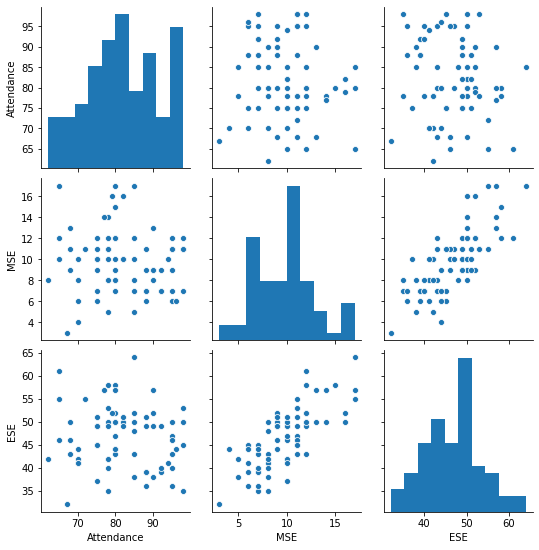

In [12]:
sns.pairplot(df)

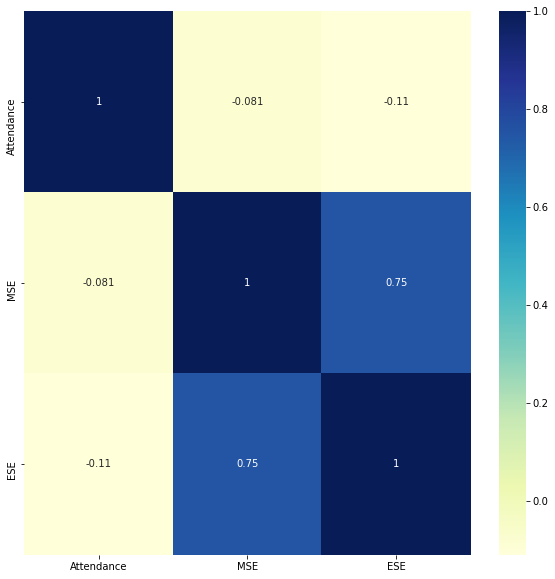

In [13]:
fig, ax1= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [14]:
#Correlation analysis

In [15]:
corr=df.corr()
corr.style.background_gradient(cmap='YlGnBu')

,Attendance,MSE,ESE
Attendance,1.000000,-0.080943,-0.109972
MSE,-0.080943,1.000000,0.751530
ESE,-0.109972,0.751530,1.000000


In [16]:
#First model to explore relationship between MSE and ESE

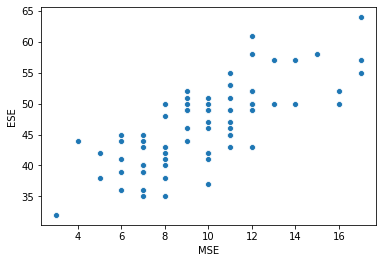

In [17]:
X = df["MSE"]
y = df["ESE"]

sns.scatterplot(X ,y)

In [18]:
x_test = df['ESE']
x_train = sm.add_constant(df[['MSE']])
print(x_train)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


In [19]:
x_test.shape

(73,)

In [20]:
mod = sm.OLS(x_test, x_train)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.85e-14
Time:                        16:58:32   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

In [21]:
def RSE(y_test, y_train):
   
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    RSS = np.sum(np.square(y_test - y_train))

    rse = math.sqrt(RSS / (len(y_test) - 2))
    return rse

In [22]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.396224549647787


In [23]:
#Second model to explore relationship between attendance and ESE

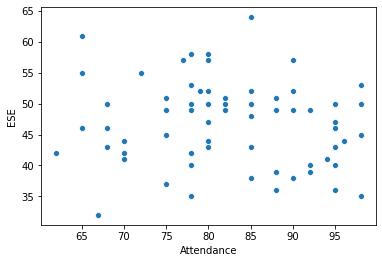

In [24]:
X1 = df["Attendance"]
y1 = df["ESE"]

sns.scatterplot(X1 ,y1)

In [25]:
x_test1 = df['ESE']
x_train1 = sm.add_constant(df[['Attendance']])
print(x_train1)

    const  Attendance
0     1.0          70
1     1.0          92
2     1.0          67
3     1.0          82
4     1.0          80
..    ...         ...
68    1.0          80
69    1.0          78
70    1.0          92
71    1.0          78
72    1.0          78

[73 rows x 2 columns]


In [26]:
x_test1.shape

(73,)

In [27]:
x_train1.shape

(73, 2)

In [28]:
mod1 = sm.OLS(x_test1, x_train1) 
results1 = mod1.fit() 
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.354
Time:                        17:00:05   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0

In [29]:
def RSE(y_test1, y_train1):
   
    y_test1 = np.array(y_test1)
    y_train1 = np.array(y_train1)
    RSS = np.sum(np.square(y_test1 - y_train1))

    rse = math.sqrt(RSS / (len(y_test1) - 2))
    return rse

In [30]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.396224549647787
